## EXPLORING CHICAGO AIRBNB LISTINGS
### The Questions i want to Ans:
The room types available

The Monthly price vs availability 

The top neighborhoods by price means

The minimum stay per night by room type.

The reviews for each room type

## Loading and Cleaning the Data

In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the csv files
li=pd.read_csv('listings.csv')




In [3]:
#shape
print(li.shape)

(7889, 16)


In [4]:
li.sample(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
921,9992834,ENTIRE BUILDING - Walk to Wrigley - SLEEPS 26!,51270838,Tbfs,NaN,Lake View,41.93286,-87.65873,Entire home/apt,900,1,29,2019-12-15,0.55,29,326


In [5]:
#check for null values
li.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7889
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1234
reviews_per_month                 1234
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [6]:
#clean my data drop the neighbourhood_group column and last review column. fill nan values on reviews per month with 0
#drop the neighbourhood_group column and last review column.
li.drop(['last_review'],axis=1,inplace=True)
li.drop(['neighbourhood_group'],axis=1,inplace=True)

#fill nan values on reviews_per_month with 0
li['reviews_per_month'].fillna(0,inplace = True)

# Explore And Visualize the Data
## Identify the Room Types

In [7]:
#unique neighborhood and room types
print(li['neighbourhood'].unique())
print(li['room_type'].unique())

['Hyde Park' 'South Lawndale' 'West Town' 'Lincoln Park' 'Logan Square'
 'Near North Side' 'Uptown' 'North Center' 'Lake View' 'Irving Park'
 'Portage Park' 'Pullman' 'Near South Side' 'West Ridge' 'Near West Side'
 'Chatham' 'Edgewater' 'Bridgeport' 'Woodlawn' 'Albany Park' 'Kenwood'
 'Douglas' 'Rogers Park' 'Lincoln Square' 'Grand Boulevard' 'Forest Glen'
 'Loop' 'Lower West Side' 'Humboldt Park' 'East Garfield Park'
 'North Lawndale' 'Oakland' 'Beverly' 'Mckinley Park' 'Avondale'
 'Norwood Park' 'Washington Park' 'Morgan Park' 'Dunning' 'South Shore'
 'Armour Square' 'South Deering' 'Auburn Gresham' 'West Garfield Park'
 'Hermosa' 'Hegewisch' 'South Chicago' 'North Park' 'Jefferson Park'
 'West Elsdon' 'Austin' 'Ashburn' 'Belmont Cragin'
 'Greater Grand Crossing' 'Garfield Ridge' 'Brighton Park'
 'Archer Heights' 'Edison Park' 'West Lawn' 'New City' 'Englewood'
 'Avalon Park' 'Gage Park' 'Montclare' 'Roseland' 'Clearing'
 'Calumet Heights' 'Washington Heights' 'Fuller Park' 'West Pu

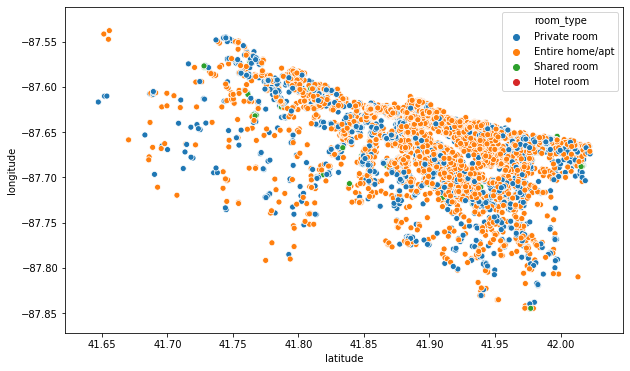

In [16]:
#plot the room types using a scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(li.latitude,li.longitude,hue=li.room_type)
plt.ioff()
plt.savefig('room_type.png')

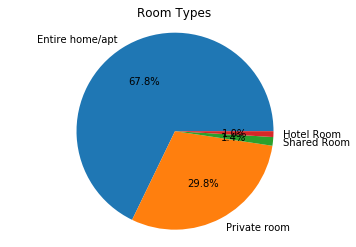

In [30]:
#plot the room types with a pie 
my_data = li['room_type'].value_counts()
my_labels = 'Entire home/apt','Private room','Shared Room','Hotel Room'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Room Types')
plt.axis('equal')
plt.savefig('pie_room.png')

## Neighborhoods

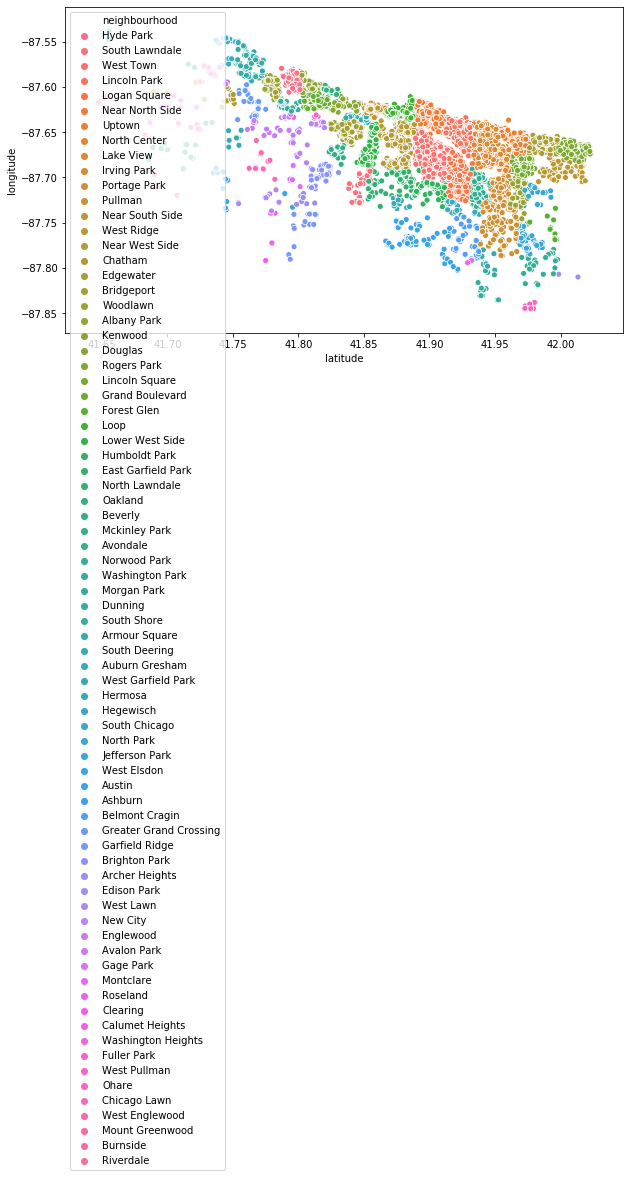

In [34]:
# scatter plot of the neighborhoods
plt.figure(figsize=(10,6))
sns.scatterplot(li.latitude,li.longitude,hue=li.neighbourhood)
plt.ioff()

# Top Five Neighborhoods

In [8]:
#additional imports
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

In [33]:
chi_mean =li.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head()
#chi_mean


#make the plot
neighbourhoods= ['#165B33', '#F8B229', '#d4c7bc', '#EA4630', '#784a42']
mydata = go.Bar(x= chi_mean.index,
                y= chi_mean.values,
                marker=dict(color=neighbourhoods))
# now the layout
mylayout=go.Layout(title="Top Five Neighborhoods in Chicago Price Means",
                   xaxis= dict(title='neighbourhood'),
                   yaxis=dict(title='price'))
# bind using go.Figure
myfig = go.Figure(data=[mydata], layout=mylayout)
myfig.show()

In [10]:
#save the image using api key
import chart_studio
username = 'Rwachira' # your username
api_key = 'fmDJow7kAy3PSmxPXGht' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [13]:
import chart_studio.plotly as py
#py.plot(myfig, filename = 'Top_neighborhoods', auto_open=True)

In [14]:

# neighborhood reviews
chi_review =li.groupby('neighbourhood')['reviews_per_month'].mean().sort_values(ascending=False).head()
#chi_mean


#make the plot
neighbourhoods= ['#7e4534', '#673535', '#d4c7bc', '#543936', '#784a42']
mydata = go.Bar(x= chi_review.index,
                y= chi_review.values,
                marker=dict(color=neighbourhoods))
# now the layout
mylayout=go.Layout(title="Top Five Neighborhoods in Chicago Average Reviews per month",
                   xaxis= dict(title='neighbourhood'),
                   yaxis=dict(title='Review'))
# bind using go.Figure
myfig = go.Figure(data=[mydata], layout=mylayout)
myfig.show()


#questions to answer
what is the minimum nights that guests stayed in the different rooms
what was the price per room type
scatter plot of nights and price
host how many listings do they have


# Room Availability

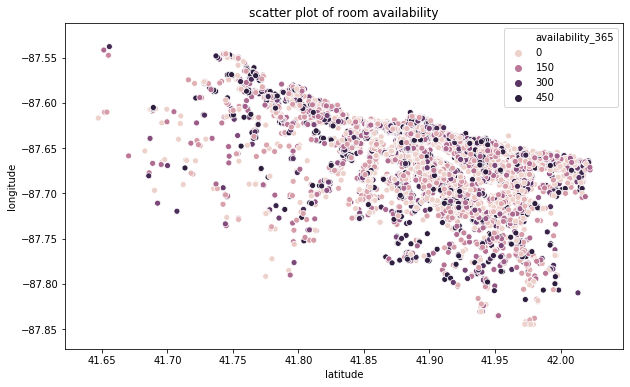

In [42]:
#scatter showing room availability
plt.figure(figsize=(10,6))
sns.scatterplot(li.latitude,li.longitude,hue=li.availability_365)
plt.title('scatter plot of room availability')
plt.ioff()

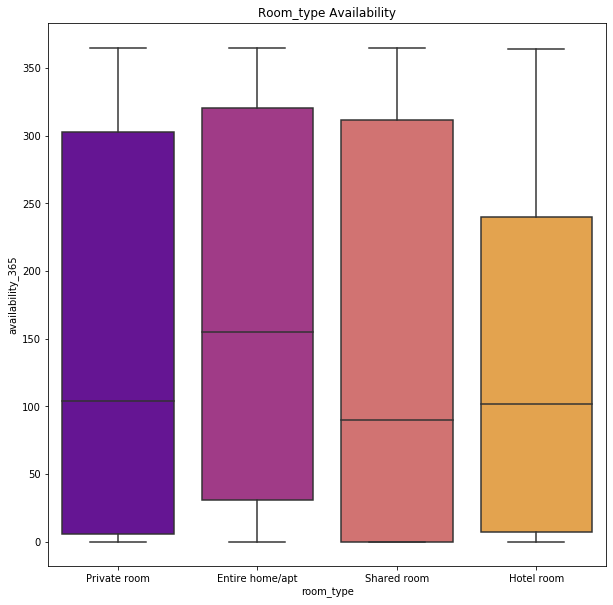

In [20]:

#relationship between neighbourhood and availability of room

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=li, x='room_type',y='availability_365',palette='plasma')
plt.title('Room_type Availability')
plt.savefig('neigborhood_availability.png')

## WordCloud

(-0.5, 399.5, 199.5, -0.5)

<Figure size 1440x720 with 0 Axes>

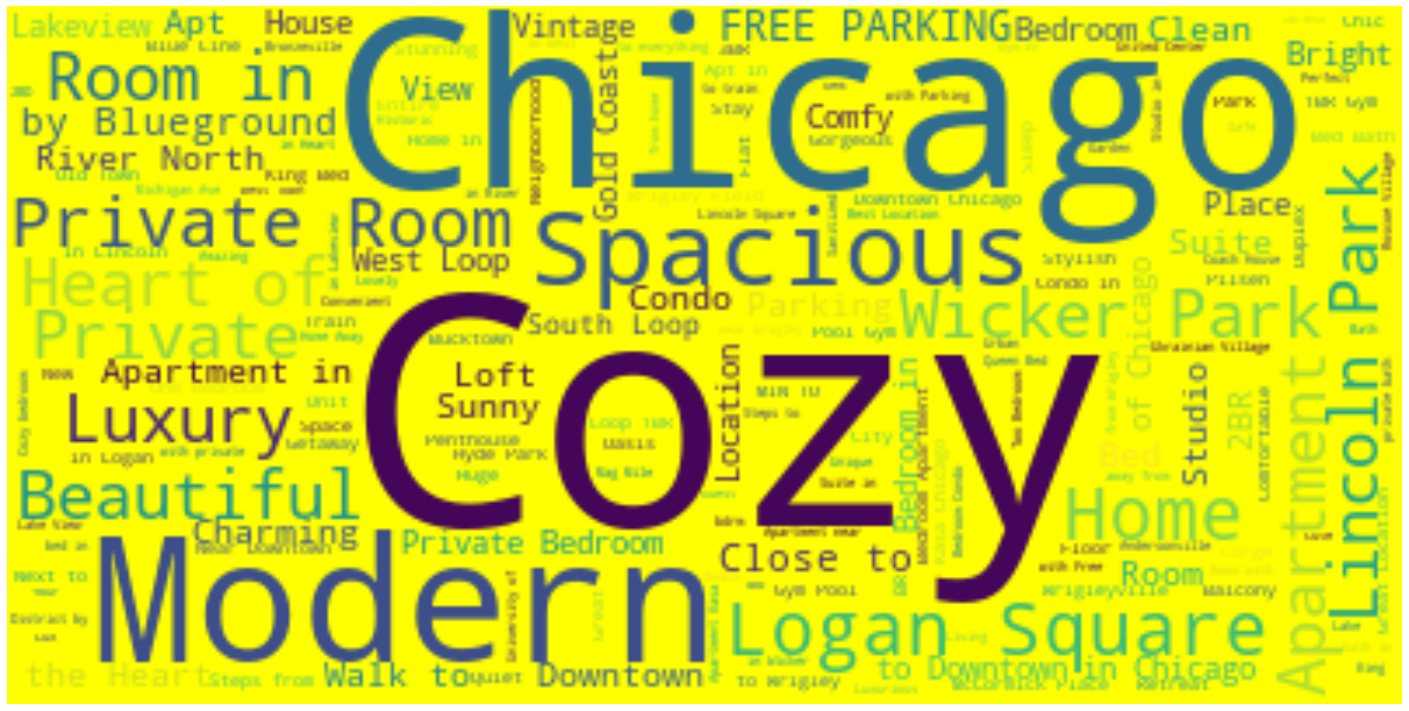

In [21]:
#! pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in li.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(20,10))
plt.figure(figsize=(25,20))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig("imagecolorgenerator.png")

# Hosts and Number of Listings

In [22]:
#number of hosts
li['host_name'].value_counts()

Blueground                       220
Sonder                            98
John                              84
Rob                               81
Natalia                           81
Joe                               76
Michael                           74
David                             68
Corp Condos & Apts                62
Kasa                              61
Zencity                           61
Nicole                            60
Alex                              48
Matt                              47
Dan                               45
Marina                            45
Loftium                           45
Helen                             43
Andrew                            39
Ryan                              36
Rent Local                        35
K                                 34
Tbfs                              31
Kari                              31
Jason                             31
Maximillian                       30
Mark                              30
E

In [23]:
# Top five hosts by listings
host_mean =li.groupby('host_name')['calculated_host_listings_count'].sum().sort_values(ascending=False).head()
host_mean

host=[['Blueground',48400],['Sonder',9604],['Natalia',6401],['Rob',5781],['Corp Condos & Apts',3844]]

df = pd.DataFrame(host, columns = ['Host', 'Total Listings']) 
df
  

  

,Host,Total Listings
0,Blueground,48400
1,Sonder,9604
2,Natalia,6401
3,Rob,5781
4,Corp Condos & Apts,3844


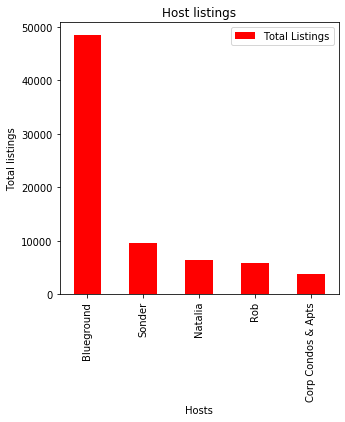

In [41]:
#plot
ax=df.plot(x ='Host', y='Total Listings', kind = 'bar', color='r',figsize=(5,5))
ax.set_xlabel("Hosts")
ax.set_ylabel("Total listings")
plt.title('Host listings')
plt.savefig("Hosts.png");

# Minimum nights stayed per room type

In [26]:
#minimum nights occupancy
x= li.groupby('room_type')['minimum_nights'].mean()
x

room_type
Entire home/apt    7.537657
Hotel room         2.120000
Private room       4.261591
Shared room        3.598214
Name: minimum_nights, dtype: float64

In [27]:
#nights=[['Entire home/apt',7.53],['Private room',4.26],['Shared room',3.59],['Hotel room',2.12]]

df2 = pd.DataFrame(x, columns = ['Room_type', 'Total Nights']) 
df2
  

,Room_type,Total Nights


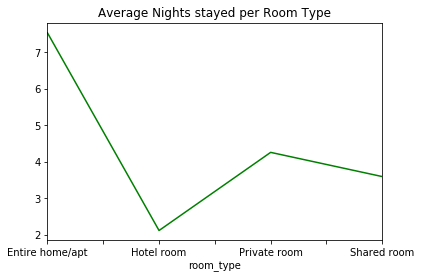

In [28]:
x.plot(x ='Room_type', y='Total Nights', kind = 'line', color='g')
ax.set_xlabel("Room Type")
ax.set_ylabel("Nights")
plt.title("Average Nights stayed per Room Type")
plt.savefig("nights.png");

In [55]:
#room availability
we= li.groupby('room_type')['availability_365'].mean()
we

room_type
Entire home/apt    169.128387
Hotel room         138.573333
Private room       155.396852
Shared room        143.339286
Name: availability_365, dtype: float64

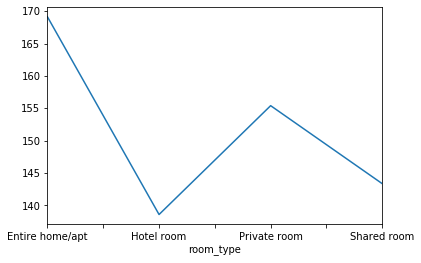

In [60]:
we.plot(x ='room_type', y='minimum_nights', kind = 'line');

In [39]:
#creating a function to group listing price as high,medium and low
def price(listprice):
    if listprice<=75:
        return 'Low'
    elif listprice>75 and listprice<=500:
        return 'Medium'
    else:
        return 'High'
    
    

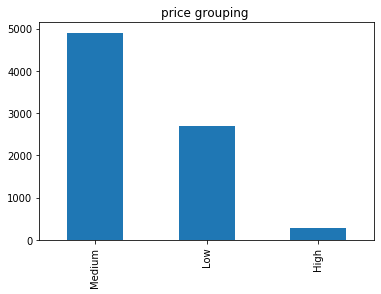

In [40]:
li.price.apply(price).value_counts().plot(kind='bar')
plt.title('price grouping ');

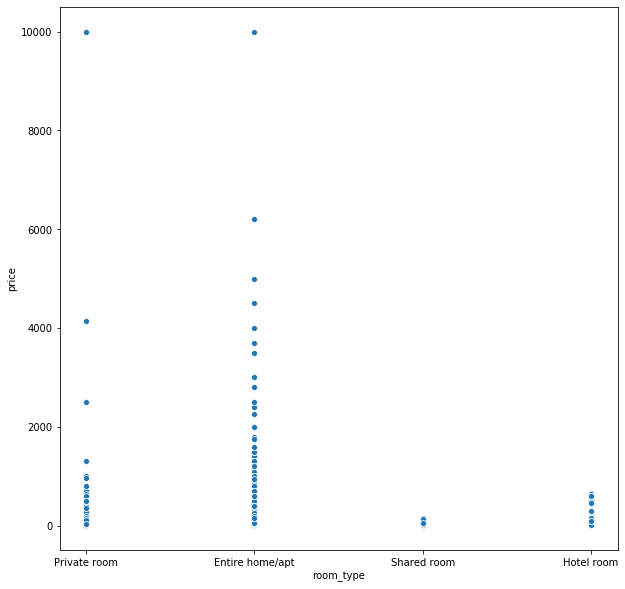

In [36]:

#relationship betweenroom type and price

plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=li, x='room_type',y='price',palette='plasma')
plt.savefig('room_price.png')